In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import floor
%matplotlib inline
from sklearn import svm
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [5]:
soil=pd.read_csv('training-soil.csv',usecols=range(1,3601))
soil.set_index('PIDN',inplace=True)

In [6]:
soil.describe()

,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,m7480.61,...,REF3,REF7,RELI,TMAP,TMFI,Ca,P,pH,SOC,Sand
count,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,...,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000
mean,0.245666,0.240454,0.235631,0.238994,0.248176,0.251674,0.243996,0.235162,0.232874,0.232518,...,-0.661642,-0.638464,0.276786,0.563194,0.746303,0.006442,-0.014524,-0.028543,0.080414,-0.012646
std,0.114439,0.114804,0.115288,0.115075,0.114185,0.113603,0.113974,0.114723,0.115031,0.115021,...,0.365572,0.326460,1.074667,0.649622,0.825242,1.070541,0.995469,0.920224,1.141989,0.988520
min,-0.042260,-0.048559,-0.055518,-0.052353,-0.040608,-0.034516,-0.042619,-0.053856,-0.057699,-0.058482,...,-1.265010,-1.115423,-0.639823,-0.670742,-0.862741,-0.535828,-0.418309,-1.886946,-0.857863,-1.493378
25%,0.171156,0.166020,0.161043,0.164470,0.173065,0.175476,0.169058,0.161094,0.159238,0.158868,...,-0.917184,-0.881048,-0.452939,0.190708,0.056843,-0.451077,-0.345681,-0.717841,-0.615639,-0.899649
50%,0.252899,0.247918,0.244594,0.247920,0.255784,0.258029,0.251061,0.243775,0.241991,0.241599,...,-0.753623,-0.740423,-0.130139,0.316667,0.729111,-0.348682,-0.269595,-0.175376,-0.349974,-0.134651
75%,0.315508,0.310354,0.304742,0.309540,0.317786,0.320834,0.314091,0.304301,0.303235,0.302438,...,-0.445135,-0.432460,0.532450,0.955935,1.414215,-0.042654,-0.089755,0.376442,0.275121,0.786391
max,0.730793,0.725493,0.720711,0.723293,0.731205,0.733872,0.726075,0.717652,0.716443,0.716307,...,0.366460,0.290323,5.612300,2.161892,2.976315,9.645815,13.266841,3.416117,7.619989,2.251685


In [7]:
#Pick some random rows and plot them to see how the field values look for those indices
indices=soil.index.values
randindices=np.random.randint(0,soil.shape[0]-1,20)
indices=[soil.index.values[index] for index in randindices]

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


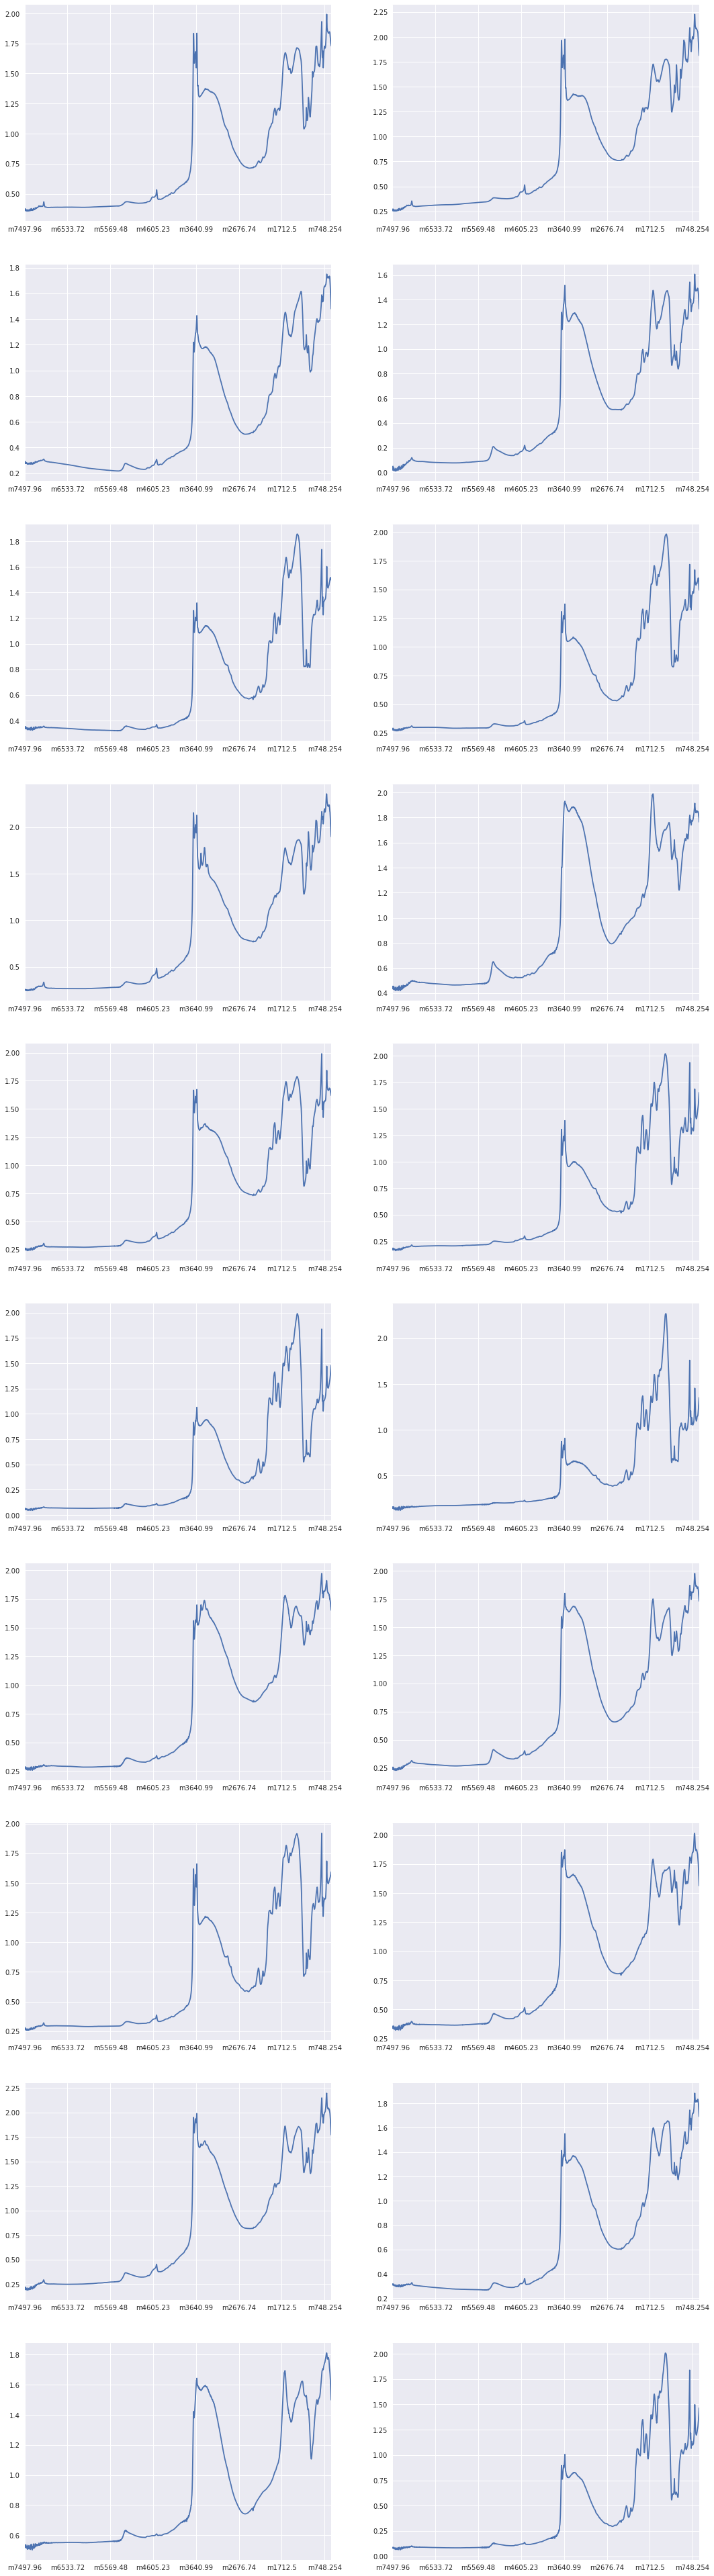

In [8]:
fig,ax=plt.subplots(nrows=10,ncols=2,sharex=False,sharey=False,figsize=(18,70))
axes=ax.ravel()
for index,axis in zip(indices,axes) :
    soil.ix[index,soil.columns[:-21]].plot(ax=axis)
plt.show()

In [9]:
soil.head().ix[:,soil.columns[-21:]]

,BSAN,BSAS,BSAV,CTI,ELEV,EVI,LSTD,LSTN,REF1,REF2,...,REF7,RELI,TMAP,TMFI,Depth,Ca,P,pH,SOC,Sand
PIDN,,,,,,,,,,,,,,,,,,,,,
XNhoFZW5,-0.630435,-0.700000,-0.783875,-0.364146,1.165479,1.062682,-0.716713,-0.090016,-0.861091,-0.537106,...,-0.646673,1.687734,0.190708,0.056843,Topsoil,-0.295749,-0.041336,-1.129366,0.353258,1.269748
9XNspFTd,-0.630435,-0.700000,-0.783875,-0.364146,1.165479,1.062682,-0.716713,-0.090016,-0.861091,-0.537106,...,-0.646673,1.687734,0.190708,0.056843,Subsoil,-0.387442,-0.231552,-1.531538,-0.264023,1.692209
WDId41qG,-0.753623,-0.836364,-0.929451,-0.633972,1.544098,1.156705,-1.282552,-0.088336,-0.935273,-0.631725,...,-0.814516,1.806660,0.190708,0.056843,Topsoil,-0.248601,-0.224635,-0.259551,0.064152,2.091835
JrrJf1mN,-0.753623,-0.836364,-0.929451,-0.633972,1.544098,1.156705,-1.282552,-0.088336,-0.935273,-0.631725,...,-0.814516,1.806660,0.190708,0.056843,Subsoil,-0.332195,-0.318014,-0.577548,-0.318719,2.118477
ZoIitegA,-0.688406,-0.763636,-0.884658,-0.583576,1.276837,1.191691,-1.206971,0.011420,-0.906182,-0.528757,...,-0.780242,0.430513,0.190708,0.056843,Topsoil,-0.438350,-0.010210,-0.699135,-0.310905,2.164148


In [10]:
def ShuffleData(frame):
    return frame.reindex(np.random.permutation(frame.index.values))
    
def GetDummifiedSoilDepth(frame):
    dummifieddata=pd.get_dummies(frame.Depth)
    frame.insert(0,'Subsoil',dummifieddata['Subsoil'])
    frame.insert(0,'Topsoil',dummifieddata['Topsoil'])
    frame=frame.drop('Depth',1)
    return frame

In [11]:
def GetTestTrainData(frame,size):
    frame=ShuffleData(frame)
    frame=GetDummifiedSoilDepth(frame)
    indexval=int(floor(frame.shape[0]*size))
    X_train=frame.ix[0:indexval,frame.columns[:-5]]
    X_test=frame.ix[indexval:,frame.columns[:-5]]
    
    Ca_train=frame.ix[0:indexval,'Ca']
    Ca_test=frame.ix[indexval:,'Ca']
    
    P_train=frame.ix[0:indexval,'P']
    P_test=frame.ix[indexval:,'P']
    
    pH_train=frame.ix[0:indexval,'pH']
    pH_test=frame.ix[indexval:,'pH']
    
    SOC_train=frame.ix[0:indexval,'SOC']
    SOC_test=frame.ix[indexval:,'SOC']
    
    Sand_train=frame.ix[0:indexval,'Sand']
    Sand_test=frame.ix[indexval:,'Sand']
    
    
    return X_train,Ca_train,P_train,pH_train,SOC_train,Sand_train,X_test,Ca_test,P_test,pH_test,SOC_test,Sand_test

In [12]:
testtraindata=GetTestTrainData(soil,0.75)

In [64]:
model=svm.SVR(C=0.1,epsilon=0.1,kernel='linear',verbose=True)

In [65]:
model.fit(testtraindata[0],testtraindata[1])

[LibSVM]

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=True)

In [67]:
prediction=model.predict(testtraindata[6])
resulstsDF=pd.DataFrame({
        'actual':testtraindata[7],
        'predicted':prediction,
        'error':testtraindata[7] - prediction
    })

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


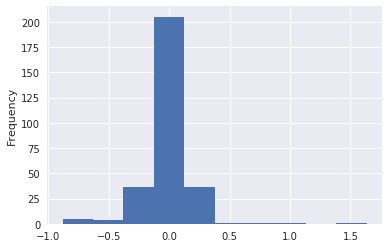

In [68]:
resulstsDF.error.plot('hist')

In [70]:
model.score(testtraindata[6],testtraindata[7])

0.92744314980744291

In [24]:
# Create a Models dictionary to house the parameter data for the different params
MODELS=[
    {
        'model': svm.SVR(),
        'params':{
            'C':[0.001,0.01,0.1,1],
            'epsilon':[0.001,0.01,0.1],
            'kernel':['linear']},
         'name':'SVR'
              },
    
    {
        'model': linear_model.Lasso(),
        'params':{'alpha':[0.001,0.01,0.1,1]},
        'name':'Lasso'
              },
    
    {
        'model': linear_model.Ridge(),
        'params':{'alpha':[0.001,0.01,0.1,1]},
        'name':'Ridge'
              },
    
    {
        'model': linear_model.ElasticNet(),
        'params':{'alpha':[0.001,0.01,0.1,1],
                  'l1_ratio':[0.001,0.01,0.1,1]},
        'name':'ElasticNet'
              },
    ]

In [30]:
def GridSearchModelling(X_train,y_train,X_test,y_test):
    for model in MODELS:
        gsmodel=GridSearchCV(estimator=model['model'],n_jobs=1,cv=10,param_grid=model['params'],verbose=1)
        gsmodel.fit(X_train,y_train)
        print(model['name'],' Score:',gsmodel.score(X_test,y_test))
        print(gsmodel.best_params_)

In [ ]:
GridSearchModelling(testtraindata[0],testtraindata[1],testtraindata[6],testtraindata[7])

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 10.2min finished


SVR  Score: 0.87454951204
{'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}
Fitting 10 folds for each of 4 candidates, totalling 40 fits


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of

Lasso  Score: 0.904632944259
{'alpha': 0.001}
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    7.1s finished


Ridge  Score: 0.920199458067
{'alpha': 1}
Fitting 10 folds for each of 16 candidates, totalling 160 fits


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of

In [28]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either estimator needs to provide a ``score`` function,
 |      or ``scoring`` must be passed.
 |  
 |  param_grid : dict or list of dictionaries
 |      Dictionary with parameters names (string) as ke